# Análisis de variables

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/LocalTime_2015.csv', index_col=0, parse_dates=True)
df2015 = pd.read_csv('./drive/MyDrive/DatosInvestigacion/2015_2016_dataset.csv', index_col=0, parse_dates=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df2015.head()

DC  PAAVG1H  PAMAX1H  PAMIN1H  ...  WR1H  WS1HA  WS1HM  WS1HX
Local_Time                                            ...                           
2015-01-01 01:00:00  13.1    743.2    743.6    742.8  ...  15.0    1.0    0.0    2.9
2015-01-01 02:00:00  13.1    742.6    742.8    742.4  ...  26.0    1.8    0.0    3.0
2015-01-01 03:00:00  13.1    742.1    742.4    741.9  ...  28.0    1.9    0.5    2.9
2015-01-01 04:00:00  13.0    741.8    741.9    741.7  ...  23.0    1.5    0.4    2.7
2015-01-01 05:00:00  13.0    741.8    741.9    741.7  ...  21.0    1.4    0.4    2.6

[5 rows x 49 columns]

## Correlación

Se buscará la correlación existente entre la variable de radiación solar global y las siguiente variables dentro del dataset: 
* TAMAX1H ( Temperatura del aire Máxima )
* TAMIN1H ( Temperatura del aire Mínima )
* RHMAX1H ( Humedad Relativa Máxima )
* RHMIN1H ( Humedad Relativa Mínima )
* PRSUM1H ( Precipitación Sumatoria )
* PAAVG1H ( Presión Barométrica Promedio )
* PAMAX1H ( Presión Barométrica Máxima )
* PAMIN1H ( Presión Barométrica Mínima )
* WS1HA ( Velocidad del Viento Promedio )
* WS1HX ( Velocidad del Viento Máxima )
* WD1HA ( Dirección del viento Promedio )

Se obtiene la matriz de correlación

In [ ]:
df_simple = df2015[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']]

In [ ]:
df_simple.dtypes

SRGLOAVG1H    float64
TAMAX1H       float64
TAMIN1H       float64
RHMAX1H       float64
RHMIN1H       float64
PRSUM1H       float64
PAAVG1H       float64
PAMAX1H       float64
PAMIN1H       float64
WS1HA         float64
WS1HX         float64
WD1HA           int64
dtype: object

In [ ]:
corr_matrix = df2015[['SRGLOAVG1H','TAMAX1H','TAMIN1H','RHMAX1H','RHMIN1H','PRSUM1H','PAAVG1H','PAMAX1H','PAMIN1H','WS1HA','WS1HX','WD1HA']].corr()

In [ ]:
corr_matrix

SRGLOAVG1H   TAMAX1H   TAMIN1H  ...     WS1HA     WS1HX     WD1HA
SRGLOAVG1H    1.000000  0.745648  0.650247  ...  0.504781  0.627460 -0.087559
TAMAX1H       0.745648  1.000000  0.960278  ...  0.522242  0.684614 -0.055408
TAMIN1H       0.650247  0.960278  1.000000  ...  0.516823  0.652443 -0.044274
RHMAX1H      -0.647749 -0.731879 -0.709256  ... -0.543850 -0.665594  0.280321
RHMIN1H      -0.744709 -0.815845 -0.726461  ... -0.529016 -0.691858  0.242592
PRSUM1H      -0.048202  0.004465  0.010873  ... -0.031689  0.003528  0.094794
PAAVG1H      -0.039586 -0.252643 -0.264353  ... -0.113401 -0.182639 -0.323963
PAMAX1H      -0.020695 -0.233366 -0.246577  ... -0.108230 -0.170323 -0.319657
PAMIN1H      -0.058764 -0.271090 -0.281059  ... -0.118004 -0.193174 -0.327611
WS1HA         0.504781  0.522242  0.516823  ...  1.000000  0.910233 -0.089683
WS1HX         0.627460  0.684614  0.652443  ...  0.910233  1.000000 -0.056590
WD1HA        -0.087559 -0.055408 -0.044274  ... -0.089683 -0.056590  1.000000

[12 rows x 12 columns]

Se grafica un mapa de calor para tener una guía visual de la correlación entre las variables.

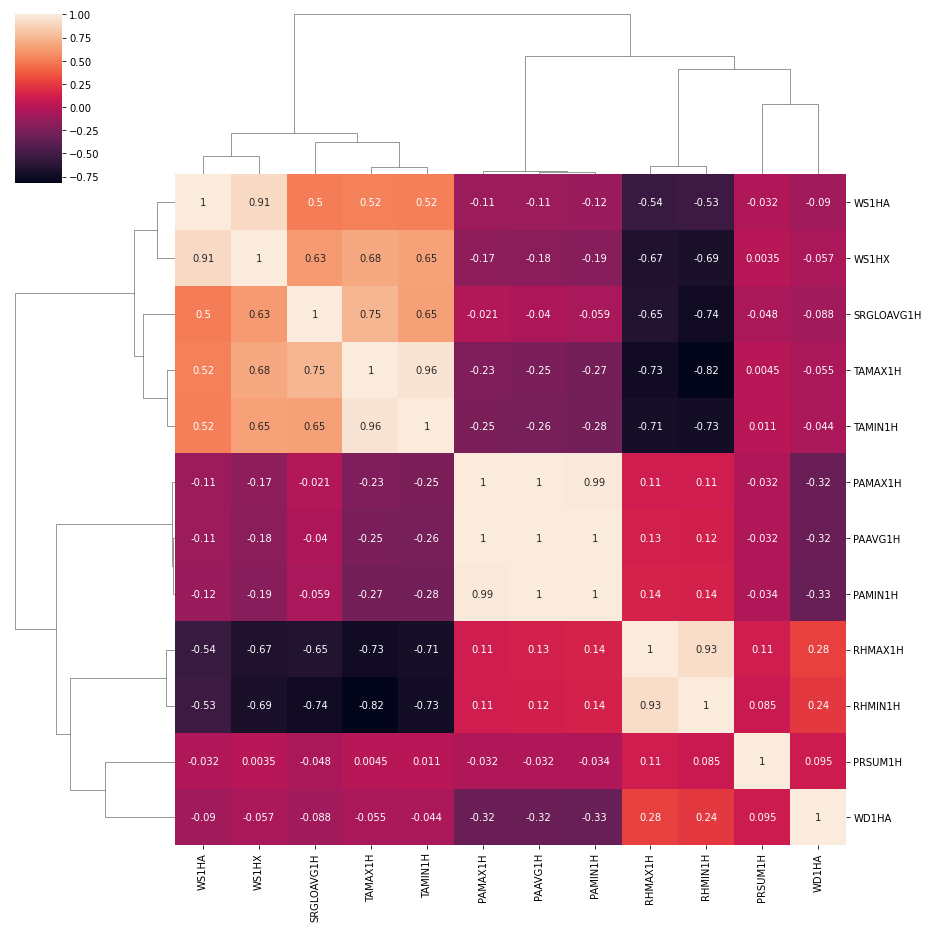

In [ ]:
sns.clustermap(corr_matrix,annot=True,figsize=(13,13))

Las variables que tienen mayor correlación con la radiación solar son:
* Temperatura máxima y mínima (positiva)
* Humedad relativa máxima y mínima (negativa)
* Velocidad del viento promedio y máxima (positiva)

In [ ]:
corr_matrix['SRGLOAVG1H'].sort_values(ascending=False)

SRGLOAVG1H    1.000000
TAMAX1H       0.745648
TAMIN1H       0.650247
WS1HX         0.627460
WS1HA         0.504781
PAMAX1H      -0.020695
PAAVG1H      -0.039586
PRSUM1H      -0.048202
PAMIN1H      -0.058764
WD1HA        -0.087559
RHMAX1H      -0.647749
RHMIN1H      -0.744709
Name: SRGLOAVG1H, dtype: float64

## Gráfico de variables más importantes

In [ ]:
!pip install plotly==5.5.0

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
from sklearn.preprocessing import MinMaxScaler

Se crea un objeto para normalizar los datos.

In [ ]:
scalerRSG = MinMaxScaler()

Se crea un dataset con los datos más importantes normalizados.

In [ ]:
df = df2015

In [ ]:
df_simple = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMAX1H','RHMIN1H']]

In [ ]:
dfNormal = df_simple.copy()

In [ ]:
scalerRSG.fit(dfNormal)

MinMaxScaler()

In [ ]:
values = scalerRSG.transform(dfNormal)

In [ ]:
for i, column in enumerate(dfNormal.columns):
  dfNormal[column] = values[:,i]

In [ ]:
dfNormal.head()

SRGLOAVG1H   TAMAX1H  ...   RHMAX1H   RHMIN1H
Local_Time                                 ...                    
2015-01-01 01:00:00         0.0  0.506711  ...  0.987654  0.932584
2015-01-01 02:00:00         0.0  0.510067  ...  0.962963  0.932584
2015-01-01 03:00:00         0.0  0.520134  ...  0.938272  0.921348
2015-01-01 04:00:00         0.0  0.526846  ...  0.950617  0.921348
2015-01-01 05:00:00         0.0  0.516779  ...  0.975309  0.932584

[5 rows x 7 columns]

Se grafican los datos en líneas de tiempo.

In [ ]:
fig = px.line(dfNormal, x=df.index, y=dfNormal.columns, title='Radiación Solar Global Promedio')
fig.update_xaxes(rangeslider_visible=True,
        rangeselector=dict(
        buttons=list([
          dict(count=1, label="1d", step="day", stepmode="backward"),
          dict(count=7, label="1w", step="day", stepmode="backward"),
          dict(count=14, label="2w", step="day", stepmode="todate"),
          dict(count=1, label="1m", step="month", stepmode="backward"),
          dict(step="all")
        ]))
)
fig.show()

### Análisi visual de variables por mes

Se agrega una columna extra para el mes.

In [ ]:
df_simple['month'] = df.index.month_name()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_simple

SRGLOAVG1H  TAMAX1H  TAMIN1H  ...  RHMAX1H  RHMIN1H     month
Local_Time                                         ...                            
2015-01-01 01:00:00         0.0      9.7      8.1  ...     99.0     94.0   January
2015-01-01 02:00:00         0.0      9.8      9.1  ...     97.0     94.0   January
2015-01-01 03:00:00         0.0     10.1      9.7  ...     95.0     93.0   January
2015-01-01 04:00:00         0.0     10.3      9.7  ...     96.0     93.0   January
2015-01-01 05:00:00         0.0     10.0      9.0  ...     98.0     94.0   January
...                         ...      ...      ...  ...      ...      ...       ...
2016-12-31 20:00:00         0.0     12.4     12.2  ...    100.0    100.0  December
2016-12-31 21:00:00         0.0     12.3     12.2  ...    100.0    100.0  December
2016-12-31 22:00:00         0.0     12.3     12.2  ...    100.0    100.0  December
2016-12-31 23:00:00         0.0     12.3     11.7  ...    100.0    100.0  December
2017-01-01 00:00:00         0.0     11.8     10.9  ...    100.0    100.0   January

[17544 rows x 8 columns]

Se realiza un gráfico de cajas que toma en cuenta todos los datos.

In [ ]:
fig = go.Figure()

for column in df_simple.columns:
  if(column == 'month'):
    continue
  fig.add_trace(go.Box(x=df_simple['month'],y=df_simple[column],name=column))

fig.show()

Se realiza un nuevo gráfico de cajas, pero se descarta la noche para no sesgar los datos de radiación solar.

In [ ]:
dfDay = df_simple.between_time('07:00:00','18:00:00')

In [ ]:
fig = go.Figure()

for column in dfDay.columns:
  if(column == 'month'):
    continue
  fig.add_trace(go.Box(x=dfDay['month'],y=dfDay[column],name=column))

fig.show()

### Análisis visual de variables por hora

In [ ]:
df_horario = dfDay.copy()

Se agrega una columna para la hora del día.

In [ ]:
df_horario['time'] = dfDay.index.time.astype(str)

In [ ]:
df_horario.head()

SRGLOAVG1H  TAMAX1H  TAMIN1H  ...  RHMIN1H    month      time
Local_Time                                         ...                            
2015-01-01 07:00:00        15.0     10.7      9.1  ...     91.0  January  07:00:00
2015-01-01 08:00:00       107.0     12.2      9.5  ...     89.0  January  08:00:00
2015-01-01 09:00:00       394.0     15.1     12.2  ...     76.0  January  09:00:00
2015-01-01 10:00:00       728.0     18.1     15.1  ...     57.0  January  10:00:00
2015-01-01 11:00:00       428.0     18.4     16.7  ...     58.0  January  11:00:00

[5 rows x 9 columns]

Se grafican los datos desde las 7 de la mañana hasta las seis de la tarde.

In [ ]:
fig = go.Figure()

for column in df_horario.columns:
  if(column=='time' or column=='month'):
    continue
  # x = horario, 
  fig.add_trace(go.Box(x=df_horario['time'],y=df_horario[column],name=column))

fig.show()

Se puede concluir que el horario para trabajar con los modelos de predicción puede ser de 8 a 17.

### Análisis visual con barras de error.

Se busca realizar un análisis similar al de las cajas de error, pero con datos normalizados, debido al solapamiento de los datos, las barras de error resultan una mejor herramienta.

In [ ]:
df_simple = df[['SRGLOAVG1H','TAMAX1H','TAMIN1H','WS1HX','WS1HA','RHMAX1H','RHMIN1H']]

In [ ]:
dfDay = df_simple.between_time('07:00:00','18:00:00')

In [ ]:
error_df = pd.DataFrame()

Se conseguirán la media y la desviación estándar de cada variable.

In [ ]:
month_mean = []
month_std = []
variable = []
month = []

In [ ]:
for column in dfDay.columns.values:
  for i in range(1,13):
    date = '2015-'+str(i)
    month.append(i)
    month_mean.append(np.mean(dfDay[column][date]))
    month_std.append(np.std(dfDay[column][date]))
    variable.append(column)

In [ ]:
error_df['month'] = month
error_df['mean'] = month_mean
error_df['std'] = month_std
error_df['variable'] = variable

In [ ]:
error_df.head()

month        mean         std    variable
0      1  340.672043  254.322556  SRGLOAVG1H
1      2  411.863095  307.186511  SRGLOAVG1H
2      3  339.244624  271.621479  SRGLOAVG1H
3      4  320.586111  244.898274  SRGLOAVG1H
4      5  328.258065  241.207264  SRGLOAVG1H

In [ ]:
fig = px.line(error_df, x="month", y="mean", color="variable", error_y="std")
fig.show()

Se realizará otro gráfico de barras de error a nivel de horario.

In [ ]:
dfDay['hour'] = dfDay.index.time.astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
error_df = pd.DataFrame()
hour_mean = []
hour_std = []
variable = []
hour = []

In [ ]:
for column in dfDay.columns.values:
  for i in range(7,19):
    if(column != 'hour'):
      if(i<10):
        h = '0'+str(i)+':00:00'
      else:
        h = str(i)+':00:00'
      hour.append(i)
      hour_mean.append(np.mean(dfDay[dfDay['hour']==h][column]))
      hour_std.append(np.std(dfDay[dfDay['hour']==h][column]))
      variable.append(column)

In [ ]:
error_df['hour'] = hour
error_df['mean'] = hour_mean
error_df['std'] = hour_std
error_df['variable'] = variable

In [ ]:
error_df.head()

hour        mean         std    variable
0     7   23.026049   19.203760  SRGLOAVG1H
1     8  144.924301   82.700133  SRGLOAVG1H
2     9  328.336668  152.252899  SRGLOAVG1H
3    10  472.597134  208.264213  SRGLOAVG1H
4    11  547.883220  243.958848  SRGLOAVG1H

In [ ]:
fig = px.line(error_df, x="hour", y="mean", color="variable", error_y="std")
fig.show()